# Лабораторная 3

Импорт необходимых библиотек

In [1]:
import numpy as np  # Для числовых операций и работы с массивами
import tensorflow as tf  # Основной фреймворк для машинного обучения
from tensorflow import keras  # Высокоуровневый API для нейросетей
from tensorflow.keras.datasets import cifar10  # Дампер конкретного датасета
from tensorflow.keras.models import Sequential  # Линейная модель нейросети
from tensorflow.keras.layers import Dense, Dropout  # Типы слоёв (полносвязный и дропаут)
from tensorflow.keras import utils  # Вспомогательные утилиты

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt  # Визуализация данных

Загрузка набора данных CIFAR-10

Данные автоматически разделяются на обучающий и тестовый наборы.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Создание списка с названиями классов, соответствующих индексам в наборе данных.

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Нормализация данных изображений путем деления на 255 (максимальное значение пикселя), чтобы значения оказались в диапазоне [0,1].

In [5]:
x_train = x_train/255
x_test = x_test/255

Значения теперь между 0 и 1

Создание модели

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=15)

D:\gadd\envs\Brp\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,970 (683.48 KB)

 Trainable params: 174,970 (683.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.1878 - loss: 2.1915
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3853 - loss: 1.7108
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.4692 - loss: 1.4787
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5134 - loss: 1.3538
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5528 - loss: 1.2538
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5887 - loss: 1.1636
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6158 - loss: 1.0918
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6385 - loss: 1.0307
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6599 - loss: 0.9680
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6816 - loss: 0.9187
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6984 - loss: 0.8750
Epoch 12

Оценка модели на тестовых данных и вывод потерь и точности.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6953 - loss: 0.8958
Test loss: 0.9055708050727844
Test acc: 0.6908000111579895


**Accuracy был 0.49, стал 0.69**

Получение предсказаний модели для всего обучающего набора.

In [8]:
predictions = model.predict(x_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step


Визуализация 5-го изображения (индекс 4) из обучающего набора с подписью истинного класса.

Text(0.5, 0, 'automobile')

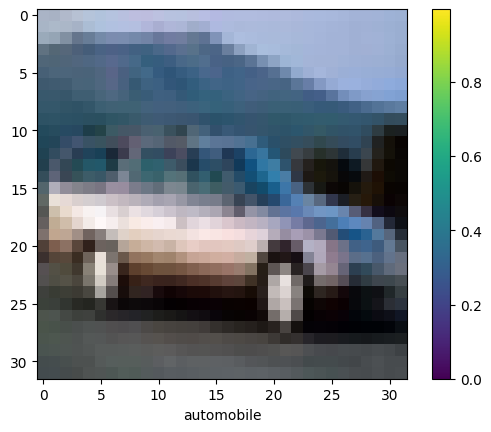

In [9]:
plt.figure()
plt.imshow(x_train[4])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[4][0]])